## Vertical Mass Exchange in KDS75

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
from netCDF4 import MFDataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap, shiftgrid # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Input NetCDF file info
file1 ='/g/data1/v45/pas561/mom/archive/VertOverturn/mom01_unmasked_ocean_grid.nc'
file2 ='/g/data1/v45/pas561/mom/archive/VertOverturn/kds75.uvwt.230-257.ncra.nc'

In [3]:
# Extract the variables
nc = Dataset(file1, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
#beta = nc.variables['beta'][:]
#f_coriolis=nc.variables['f_coriolis'][:]
#potrho = nc.variables['potrho'][:]
#ssh = nc.variables[variable][:]
#mld = nc.variables['mld'][:]
#ty_trans_rho = nc.variables['ty_trans_rho'][0,:,:,:]
nc.close() # close the file
print geolon_t.shape

nc = Dataset(file2, mode='r') # file handle, open in read only mode
#u = nc.variables['u'][:]
#v = nc.variables['v'][:]
wt = nc.variables['wt'][:]
#rho = nc.variables['pot_rho_0'][:]
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
nc.close() # close the file
print wt.shape
print sw_ocean[35]

dzt=np.gradient(st_ocean)
print 'dzt', dzt
dzw=np.gradient(sw_ocean)


(2700, 3600)
(1, 75, 2700, 3600)
363.613607545
dzt [   1.13945391    1.19933594    1.3253934     1.46469889    1.61864422
    1.78876727    1.97676724    2.18452149    2.41410412    2.66780645
    2.94815956    3.25795911    3.60029267    3.97856968    4.39655439
    4.8584019     5.36869755    5.93249989    6.55538738    7.2435089
    8.00363819    8.84323211    9.77049237   10.79443044   11.92493453
   13.17283756   14.54998403   16.06929298   17.74481312   19.59176467
   21.6265605    23.86679683   26.33120063   29.03951729   32.01231788
   35.27070094   38.83585876   42.728475     46.9679184    51.57119996
   56.55167031   61.91745309   67.66964302   73.80034563   80.29069965
   87.10909746   94.20988824  101.53289373  109.0040588   116.53747233
  124.03882243  131.41010557  138.55514591  145.38527354  151.82442661
  157.81301804  163.31013438  168.29393967  172.76045845  176.72113386
  180.19965923  183.22856964  185.84598791  188.09278858  190.01031393
  191.63867117  193.0155681

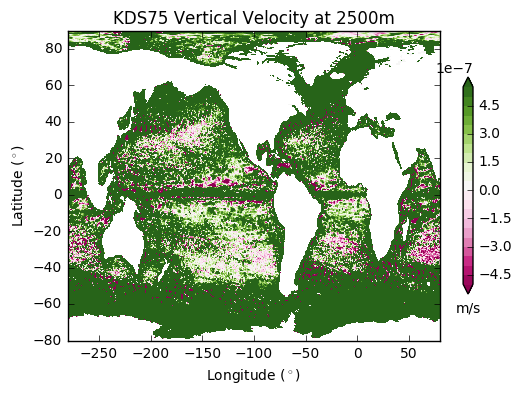

In [4]:
clev = np.arange(-.0000005,.00000055,5E-8)
#clev = np.arange(-50E-7,50E-7,5E-7)
#print clev
#plt.figure(figsize=(10,10))
plt.contourf(geolon_t,geolat_t,wt[0,35,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev = np.arange(-2,1,0.2)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('KDS75 Vertical Velocity at 2500m')

#plt.savefig('/Users/johnspence/Documents/ccrcproc/VertOverturn/wt_2500.pdf')

plt.show()

##note the colors don't show up very well ... especially the negative ones


<function matplotlib.pyplot.show>

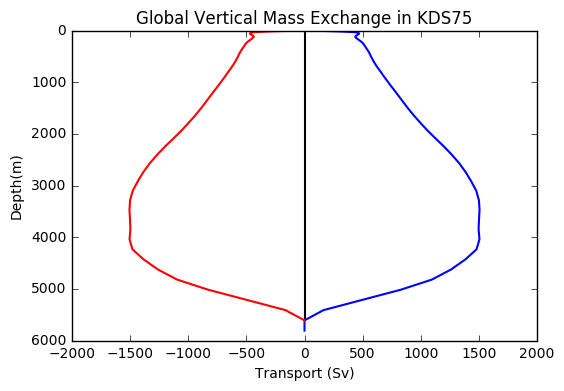

In [5]:
#global sum of wt*area at each depth level
gsumk=np.zeros(wt.shape[1])
gnsumk=np.zeros(wt.shape[1])
gpsumk=np.zeros(wt.shape[1])

#net exchange
gsumk=np.sum(np.sum(wt*area_t,axis=2),axis=2)

#positive values
wt2=wt.copy()
wt2[wt2 < 0] = 0
gpsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)

#negative values
wt2=wt.copy()
wt2[wt2 > 0] = 0
gnsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)

wt2=None

plt.plot(gsumk[0,:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(gpsumk[0,:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(gnsumk[0,:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
#plt.xlim([-75,85])
plt.title('Global Vertical Mass Exchange in KDS75')
plt.show


[740] [1750] [-44.96536163] [ 45.03607147]


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3213: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


<function matplotlib.pyplot.show>

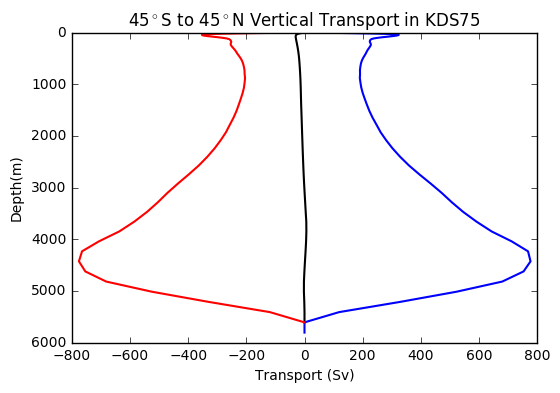

In [6]:
tmp1=np.argwhere(yt_ocean>-45)# and lat<-45)
tmp2=np.argwhere(yt_ocean>45)# and lat<-45)
print tmp1[0], tmp2[0], yt_ocean[tmp1[0]], yt_ocean[tmp2[0]]

wta=wt[0,:,tmp1[0]:tmp2[0],:]*area_t[tmp1[0]:tmp2[0],:]

#global sum
eqsumk=np.sum(np.sum(wta,axis=2),axis=1)

#positive values
wta2=wta.copy()
wta2[wta2 < 0] = 0
eqpsumk=np.sum(np.sum(wta2,axis=2),axis=1)

#negative values
wta2=wta.copy()
wta2[wta2 > 0] = 0
eqnsumk=np.sum(np.sum(wta2,axis=2),axis=1)

wta2=None

#looks good compared to matlab version!!!!
plt.plot(eqsumk[:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(eqpsumk[:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(eqnsumk[:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
#plt.xlim([-75,85])
plt.title('45$^\circ$S to 45$^\circ$N Vertical Transport in KDS75')
plt.show


In [7]:
wt=None
wta=None

In [8]:
file3 ='/g/data1/v45/pas561/mom/archive/VertOverturn/kds75.rho.230-257.ncra.nc'
nc = Dataset(file3, mode='r') # file handle, open in read only mode
rho = nc.variables['pot_rho_0'][:]
nc.close() # close the file



In [9]:
#calc drho in vertical
print rho.shape
drho=np.gradient(rho,axis=1)
drho.shape
print 'drho ', drho[0,:,500,100], rho[0,:,500,100]

#calc drho/dz
drhodz=drho[0,:,:,:].T/dzt[:, np.newaxis].T
drhodz=drhodz.T
print drhodz.shape

print 'drho rho dz drhodz', drho[0,0,500,100], rho[0,0,500,100], dzt[0], drhodz[0,500,100] 
print 'drho rho dz drhodz', drho[0,1,500,100], rho[0,1,500,100], dzt[1], drhodz[1,500,100] 


(1, 75, 2700, 3600)
drho  [0.000244140625 0.00018310546875 0.00018310546875 0.000244140625
 0.000244140625 0.000244140625 0.00042724609375 0.00079345703125
 0.00146484375 0.002197265625 0.003173828125 0.00506591796875
 0.00701904296875 0.0089111328125 0.01171875 0.017822265625 0.0328369140625
 0.05169677734375 0.05859375 0.057373046875 0.06280517578125
 0.06622314453125 0.05670166015625 0.0433349609375 0.03387451171875
 0.02734375 0.0224609375 0.01837158203125 0.014892578125 0.0125732421875
 0.01129150390625 0.010498046875 0.00982666015625 0.00927734375
 0.0087890625 0.00836181640625 0.00787353515625 0.0074462890625
 0.00726318359375 0.00701904296875 0.0068359375 0.006591796875
 0.0062255859375 0.0057373046875 0.00482177734375 0.00384521484375
 0.0030517578125 0.00238037109375 0.001953125 0.001708984375
 0.0015869140625 0.0015869140625 0.001708984375 0.001953125
 0.00238037109375 0.00286865234375 0.00311279296875 0.00323486328125
 0.0032958984375 0.003173828125 0.00286865234375 0.00244

In [10]:
print rho.shape

nc = Dataset(file2, mode='r') # file handle, open in read only mode
u = nc.variables['u'][:]
#v = nc.variables['v'][:]
#wt = nc.variables['wt'][:]
nc.close() # close the file

#calc drho/dx drho/dy
udrhodx=u*np.gradient(rho,axis=3)/dxt
#vdrhody=v*np.gradient(rho,axis=2)/dyt
print udrhodx.shape
#print dxt.shape

u=None

nc = Dataset(file2, mode='r') # file handle, open in read only mode
#u = nc.variables['u'][:]
v = nc.variables['v'][:]
#wt = nc.variables['wt'][:]
nc.close() # close the file

#calc drho/dx drho/dy
#udrhodx=u*np.gradient(rho,axis=3)/dxt
vdrhody=v*np.gradient(rho,axis=2)/dyt
print vdrhody.shape
#print dxt.shape

v=None

#print 'drho rho dz drhodx', drho[0,0,500,100], rho[0,0,500,100], dxt[500,100], drhodx[0,500,100] 
#print 'drho rho dz drhody', drho[0,1,500,100], rho[0,1,500,100], dyt[500,100], drhody[0,500,100] 


(1, 75, 2700, 3600)


MemoryError: 

In [ ]:
nc = Dataset(file2, mode='r') # file handle, open in read only mode
#u = nc.variables['u'][:]
#v = nc.variables['v'][:]
wt = nc.variables['wt'][:]
nc.close() # close the file

#calc diapycnal vertical vel
wt_dia = wt + (udrhodx + vdrhody)/drhodz
print wt_dia.shape

wt=None




In [ ]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/VertOverturn/kds75.wt_dia.230-257.ncra.nc', 'a')

var = ofile.variables['wt']
print var.shape
print wt_dia.shape
var[:] = wt_dia

ofile.sync()
ofile.close()

In [ ]:
#plt.figure(figsize=(20,10))
#clev = np.arange(-.0001,.00012,0.00002)
#clev = np.arange(-.0000005,.00000055,5E-8)
clev = np.arange(-50E-7,50E-7,5E-7)
plt.contourf(geolon_t,geolat_t,wt_dia[0,35,:,:],clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
#clev = np.arange(-2,1,0.2)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('KDS75 Diapycnal Vertical Velocity at ~2500m')

#plt.savefig('/Users/johnspence/Documents/ccrcproc/VertOverturn/kds75_wt_dia_2500.pdf')

plt.show()

In [ ]:
clev = np.arange(-50E-7,50E-7,5E-7)
plt.contourf(geolon_t,geolat_t,wt[0,35,:,:],clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
#clev = np.arange(-2,1,0.2)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('Vertical Velocity at ~2500m')

#plt.savefig('/Users/johnspence/Documents/ccrcproc/VertOverturn/kds75_wt_2500_v2.pdf')

plt.show()

In [ ]:
print wt_dia.shape

gdsumk=np.sum(np.sum(wt_dia*area_t,axis=2),axis=2)
#print gsumk[:]
print gsumk[:]/1E6

wt2=wt_dia.copy()
wt2[wt2 < 0] = 0
print 'pos ', wt2.shape
gdpsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)
print 'gp', gdpsumk.shape
print gdpsumk[:]/1E6

wt2=wt_dia.copy()
wt2[wt2 > 0] = 0
print 'neg ', wt2.shape
gdnsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)
print 'gn', gdnsumk.shape
print gdnsumk[:]/1E6

wt2=None

#gpsumk=np.sum(np.sum(where(tmp>0),axis=2),axis=2)
##print gpsumk[:]
#print 'gp', gpsumk.shape
#print gpsumk[:]/1E6


plt.plot(gsumk[0,:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(gpsumk[0,:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(gnsumk[0,:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')

plt.plot(gdsumk[0,:]/1E6,sw_ocean,linestyle=':',color='k',linewidth=1.5,label='masked')
plt.plot(gdpsumk[0,:]/1E6,sw_ocean,linestyle=':',color='b',linewidth=1.5,label='masked')
plt.plot(gdnsumk[0,:]/1E6,sw_ocean,linestyle=':',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
plt.xlim([-1000,1000])
plt.title('Global Net and Diapycnal Component of Vertical Transport in KDS75')
plt.show


In [ ]:
tmp1=np.argwhere(yt_ocean>-45)# and lat<-45)
tmp2=np.argwhere(yt_ocean>45)# and lat<-45)
print tmp1[0], tmp2[0], yt_ocean[tmp1[0]], yt_ocean[tmp2[0]]

wta=wt_dia[0,:,tmp1[0]:tmp2[0],:]*area_t[tmp1[0]:tmp2[0],:]
print wta.shape

eqdsumk=np.sum(np.sum(wta,axis=2),axis=1)

wta2=wta.copy()
wta2[wta2 < 0] = 0
#print 'pos ', wt2.shape
eqdpsumk=np.sum(np.sum(wta2,axis=2),axis=1)
print 'eq dia', eqdpsumk.shape
print eqdpsumk[:]/1E6

wta2=wta.copy()
wta2[wta2 > 0] = 0
print 'neg ', wta2.shape
eqdnsumk=np.sum(np.sum(wta2,axis=2),axis=1)
print 'eq', eqdnsumk.shape
print eqdnsumk[:]/1E6

wta2=None

#looks good compared to matlab version!!!!
plt.plot(eqsumk[:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(eqpsumk[:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(eqnsumk[:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.plot(eqdsumk[:]/1E6,sw_ocean,linestyle=':',color='k',linewidth=1.5,label='masked')
plt.plot(eqdpsumk[:]/1E6,sw_ocean,linestyle=':',color='b',linewidth=1.5,label='masked')
plt.plot(eqdnsumk[:]/1E6,sw_ocean,linestyle=':',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
plt.xlim([-1000,1000])
plt.title('45N-45S Net and Diapycnal Component of Vertical Transport in KDS75')
plt.show
